What is Pandas?
---

From https://pandas.pydata.org/pandas-docs/stable:

> pandas is a Python package providing fast, flexible, and expressive data structures designed to
> make working with “relational” or “labeled” data both easy and intuitive. It aims to be the
> fundamental high-level building block for doing practical, real world data analysis in Python.
> Additionally, it has the broader goal of becoming the most powerful and flexible open source data
> analysis / manipulation tool available in any language. It is already well on its way toward this
> goal.

I tend to use Pandas to work with tabular data, similar to columns and rows in an Excel spreadsheet. However, what do you do if your data no longer fits in an Excel sheet? Use Pandas.

Pandas is built on top of NumPy, a lower level numerical computing library with a fast multidimensional array object. I decided to forgo an introduction to NumPy because learning Pandas will provide you many of the fundamentals of NumPy. Let's start by looking at the fundamental data structures in Pandas.

Importing Pandas
---

First, you need to `import pandas`. By convention, it is imported with the shorter library name `pd`. That is done with the following syntax:

```python
import <library> as <short name>
```

#### Tasks:

1. Import pandas using the short name convention.

In [1]:
import pandas as pd

Basic Data Structures
---

Similar to the basic Python data structures (e.g. `list, dictionary, set`), Pandas is built on top of three fundamental data structures:

1. `Series`: For one-dimensional data, similar to a `list` or NumPy array
2. `DataFrame`: For two-dimensional data, similar to a `dictionary` or 2d NumPy Array
3. `Index`: Similar to a `Series`, but for naming, selecting, and transforming data within a `Series` or `DataFrame`

### Series

You can create pandas `Series` in a few ways:

- From a named Python list:
```python
a = ['a', 'b', 'c']
series = pd.Series(a)
```
- Or, from a temporary Python list:
```python
series = pd.Series([4, 5, 6])
```
- Or, using specific index (similar to `dict`, keys are index, values are list):
```python
series = pd.Series([4, 5, 6], index=['a', 'b', 'c'])
```
- Or, directly from a dictionary (exactly the same as above):
```python
series = pd.Series({'a': 4, 'b': 5, 'c': 6})
```

### DataFrame

This is the data structure that makes Pandas so powerful. A `DataFrame` is essentially built from many `Series` objects. A `Series` is very similar to a `dict`, the `index` are keys each of which have a value. In a `DataFrame`, the `keys` map to `Series` objects which share a common `index`. An example:

```python
rock_bands = ['Pink Floyd', 'Rush', 'Yes']
year_formed = [1965, 1968, 1968]
location_formed = ['London, England', 'Ontario, Canada', 'London, England']
df = pd.DataFrame({'year_formed': year_formed, 'location_formed': location_formed}, index=rock_bands)
```

Additionally, `DataFrame`'s can be constructed from files! In one of the previous tasks, you were asked to read a bar separated values (bsv) file, parse it manually, and rewrite it to comma separated values (csv). This was a ridiculous task and could have been completed with 2 lines of pandas! Reminder, these files don't contain headers!

```python
df = pd.read_csv('gpu.bsv', sep='|', header=None)
df.to_csv('gpu.csv', sep=',', header=None, index=None)
```

### Tasks

1. Use `pd.read_csv` to read in the csv file: `example.csv`. It does not contain a header. Call the variable `df`. By default `pd.read_csv` sets the seperator (`sep`) to a comma. Add `names=['col1', 'col2', 'col3']` to the list of arguments.

In [13]:
df = pd.read_csv('example.csv', header=None, names=['col1', 'col2', 'col3'])

Viewing DataFrames
---

Jupyter has built in support for viewing `DataFrame` objects in a nice format. Run the following cell:

In [14]:
df

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


You should have seen 4 rows and 4 columns. The upper most row are the `keys` and the most left column are the `index`. Think of each column as 3 `Series` objects. The following code snippet won't run, but it is meant to help you think about the `DataFrame` above:

```python
df['col1'] = pd.Series([1, 4, 7])
df['col2'] = pd.Series([2, 5, 8])
df['col3'] = pd.Series([3, 6, 9])
```

If you only want to view a subset of your DataFrame, you can use `df.head()`. By default it will print 5 rows at the top of your DataFrame. You can change the default w/ `df.head(n=<number>)`

Tasks
---

1. Try printing the `head` of `df`, does it look different from the previous code cell? Why?
2. Print only the first row of `df` using `head`

In [22]:
df.head()

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [23]:
df.head(n=1)

,col1,col2,col3
0,1,2,3


### Access and Types

You can access a DataFrame in 2 ways:

1. `df['<key>']` where `<key>` in the above `df` could be `col1` or `col2` or `col3`
2. Or, `df.<key>`

You can access the types of columns with `df.dtypes`

### Tasks

1. Access `col2` of `df` using both the `dict` style and attribute style.
2. Why are there 2 columns printed?
3. What is the type of `df.col2`?
4. What are the `dtypes` of `df`?

In [15]:
df['col2']

0    2
1    5
2    8
Name: col2, dtype: int64

In [16]:
df.col2

0    2
1    5
2    8
Name: col2, dtype: int64

In [17]:
type(df.col2)

pandas.core.series.Series

In [18]:
df.dtypes

col1    int64
col2    int64
col3    int64
dtype: object

Slicing and Indexing
---

There are many ways to slice and dice DataFrames. Let's start with the least flexible option, selecting multiple columns. Let's make a new DataFrame in the following cell.

In [32]:
example = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
example.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


To slice columns `a` and `c` we'll use a similar syntax to the dictionary access, shown before, but instead we will ask for a list of columns instead of a single one, e.g. 

In [33]:
example[['a', 'c']]

,a,c
0,1,7
1,2,8
2,3,9


One can also slice rows using a `list`-like syntax. Note you are __required__ to specify a slice (something containing '`:`'). For example,

In [58]:
# Zeroth row only
example[0:1]

,a,b,c
0,1,4,7


In [36]:
# First row to end
example[1:]

,a,b,c
1,2,5,8
2,3,6,9


In [37]:
# Every other row
example[::2]

,a,b,c
0,1,4,7
2,3,6,9


In [40]:
# This will fail with `KeyError`, because you are requesting key based access
example[0]

KeyError: 0

More Complicated Access Patterns
---

You can narrow down rows and columns using `loc`, some examples:

In [42]:
# Only row 1, columns 'a' and 'c'
example.loc[1:1, ['a', 'c']]

,a,c
1,2,8


In [43]:
# All rows, columns 'a' to 'b'
example.loc[:, 'a':'b']

,a,b
0,1,4
1,2,5
2,3,6


In [48]:
# Single row, single column
example.loc[0, 'a']

1

### Tasks

Using `loc` and the `example` DataFrame,

1. Can you get every other row, columns `b` to `c`?
2. Can you get the last row, all columns?

In [50]:
example.loc[::2, 'b':'c']

,b,c
0,4,7
2,6,9


In [62]:
example.loc[2:, :]

,a,b,c
2,3,6,9


### Note

`loc` is all about index/key access, what if the indices are characters? Run the following cell and then complete the tasks

In [64]:
example2 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}, index=['A', 'B', 'C'])
example2.head()

,a,b,c
A,1,4,7
B,2,5,8
C,3,6,9


### Tasks

Use `loc` and DataFrame `example2`, to

1. Get rows `B` to `C` and columns `a` to `b`.
2. What happens if you try to access the index numerically?

In [65]:
example2.loc['B':'C', 'a':'b']

,a,b
B,2,5
C,3,6


In [66]:
example2.loc[1:, 'a':'b']

TypeError: cannot do slice indexing on <class 'pandas.indexes.base.Index'> with these indexers [1] of <class 'int'>

### Continuation

To access `example2` w/ numerical values, we need `iloc`.

### Tasks

1. Using `iloc` and `example2`, get rows `B` to `C` and columns `a` to `b`.

In [68]:
example2.iloc[1:, 0:2]

,a,b
B,2,5
C,3,6


### Notes

You can also use the `list` style access I showed before, e.g.

In [70]:
example2.iloc[[1, 2], [0, 1]]

,a,b
B,2,5
C,3,6


Yet Another Option
---

Another way of accessing is by providing a list of indices based on a condition. For example, return rows of `example2` where column `a` is greater than or equal to 2.

In [80]:
example2[example2.a >= 2]

,a,b,c
B,2,5,8
C,3,6,9


How about columns where row `B` is greater than or equal to 5?

In [88]:
example2.loc['B'][example2.loc['B'] >= 5]

b    5
c    8
Name: B, dtype: int64

How about compound requirements? Rows where column `a` is greater than or equal to 2 and column `b` is less than 6.

In [89]:
example2[(example2.a >= 2) & (example2.b < 6)]

,a,b,c
B,2,5,8


### Notes

Indexing and slicing can be very complicated in Pandas. I think we have dwelled on it long enough.

Doing Stuff with DataFrames
---

Run the following cell:

In [90]:
states = pd.read_csv('states.bsv', sep='|')
states.head()

,State,Population,Area
0,Alabama,4874747,52420.07
1,Alaska,739795,665384.04
2,Arizona,7016270,113990.30
3,Arkansas,3004279,53178.55
4,California,39536653,163696.32


Let's explore some statistics on this DataFrame, run the following cell:

In [91]:
states.describe()

,Population,Area
count,5.000000e+01,50.000000
mean,6.500504e+06,75933.509400
std,7.345270e+06,97327.452186
min,5.793150e+05,1544.890000
25%,1.841912e+06,37416.612500
50%,4.569261e+06,57093.180000
75%,7.308375e+06,84564.897500
max,3.953665e+07,665384.040000


We can see there are 50 states in the DataFrame from `count`. The mean population is 6.5 million people in an area of 76 thousand square miles.

### Tasks

To get the minimum of a column, you could to `DataFrame.<key>.min()` (`max()` is also an option). Using this information,

1. Find the state with the smallest population
2. Find the state with the largest area
3. Find the state with the smallest population
4. Find the state with the largest area

In [98]:
states[states.Population == states.Population.min()]

,State,Population,Area
49,Wyoming,579315,97813.01


In [99]:
states[states.Area == states.Area.min()]

,State,Population,Area
38,Rhode Island,1059639,1544.89


In [101]:
states[states.Population == states.Population.max()]

,State,Population,Area
4,California,39536653,163696.32


In [100]:
states[states.Area == states.Area.max()]

,State,Population,Area
1,Alaska,739795,665384.04


Adding New Data
---

What if you were really interested in the population density, that is population divided by the area?

DataFrame's support _vectorized_ operations. Try the following cell:

In [102]:
states.Population / states.Area

0       92.993905
1        1.111832
2       61.551465
3       56.494188
4      241.524385
5       53.866426
6      647.288222
7      386.519576
8      319.117001
9      175.504462
10     130.586770
11      20.545226
12     221.054019
13     183.056023
14      55.901083
15      35.405701
16     110.230921
17      89.432994
18      37.759096
19     487.845490
20     649.949358
21     103.008473
22      64.146233
23      61.614502
24      87.703285
25       7.144281
26      24.823922
27      27.113952
28     143.627342
29    1032.451866
30      17.172998
31     363.842109
32     190.887762
33      10.684738
34     260.088302
35      56.236446
36      42.110566
37     278.052714
38     685.899320
39     156.911059
40      11.277421
41     159.357065
42     105.379632
43      36.536478
44      64.853749
45     198.013650
46     103.870350
47      74.942386
48      88.485547
49       5.922678
dtype: float64

Tasks
---

1. What is the type of `states.Population / states.Area`? Is that suprising?
2. DataFrame's are mutable, therefore you can always add a new key with Series. Store `states.Population / states.Area` in `states` with the key `Density`.
3. Which states are the most/least dense?

In [103]:
type(states.Population / states.Area)

pandas.core.series.Series

In [164]:
states['Density'] = states.Population / states.Area

In [165]:
states[states.Density == states.Density.min()]

,State,Population,Area,Density
1,Alaska,739795,665384.04,1.111832


In [166]:
states[states.Density == states.Density.max()]

,State,Population,Area,Density
29,New Jersey,9005644,8722.58,1032.451866


Viewing Data
---

Pandas plugs into `matplotlib` very nicely. I am going to iteratively build a plot which is easy to read. First, run the following cell.

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt

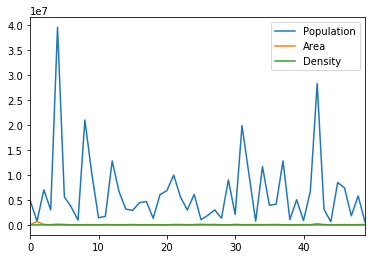

In [168]:
states.plot()

Okay, this is something, but not very helpful. What would we like:

- Plots for each column separate
- X axis should be labeled with the state

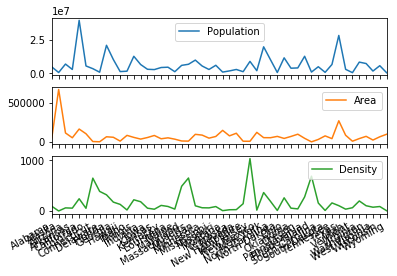

In [169]:
ax = states.plot(subplots=True, xticks=states.index)
dummy = ax[0].set_xticklabels(states.State.str.strip())

Notes
---

1. `subplots=True`: separates the 2 plots from one another
2. `xticks=states.index`: sets all of the points on the x-axis
3. `ax = ...`: is a list containing both plots
4. `ax[0].set_xticklables` changes the numeric index to the State name, should only be necessary for the 0th plot
5. `states.State.str.strip()` is an artifact from the way I made the bsv file, we will discuss string manipulation next
6. `dummy = ...`, I use this to supress the output from `set_xticklabels`


Neat, but I can't read the labels...

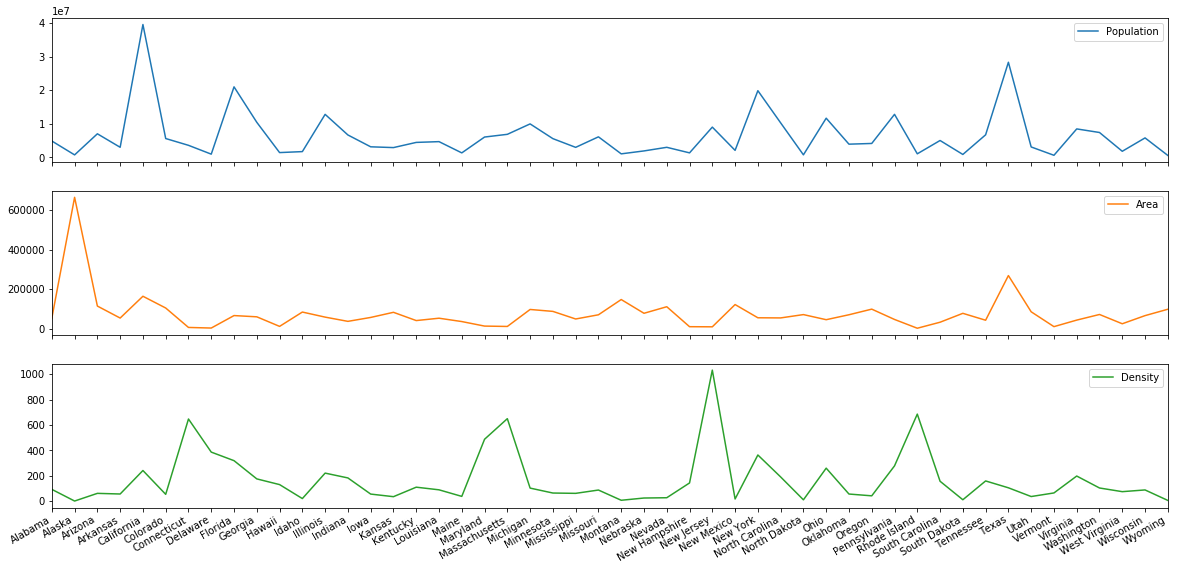

In [170]:
ax = states.plot(subplots=True, xticks=states.index, figsize=(20, 10))
dummy = ax[0].set_xticklabels(states.State.str.strip())

Line plots are a little awkward because each point is independent, but using subplots with scatter isn't intuitive. You can use matplotlib directly for this:

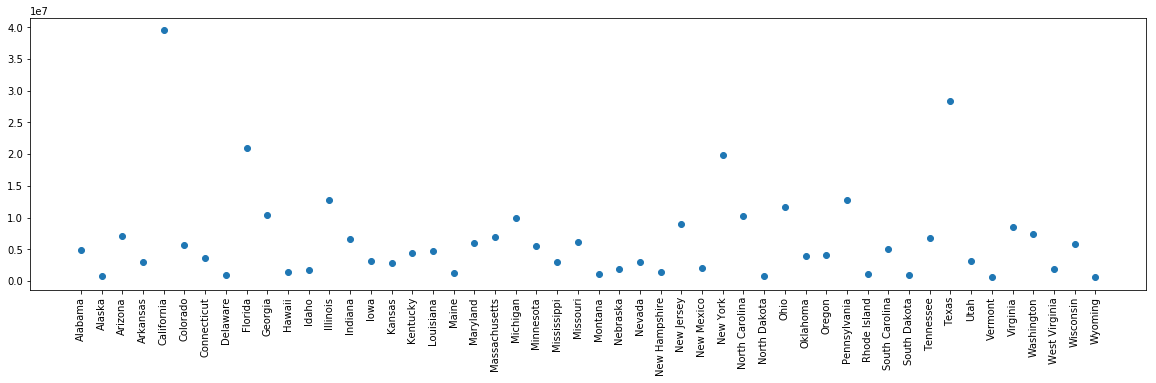

In [171]:
plt.figure(figsize=(20, 5))
plt.scatter(states.State.str.strip(), states.Population)
dummy = plt.xticks(rotation=90)

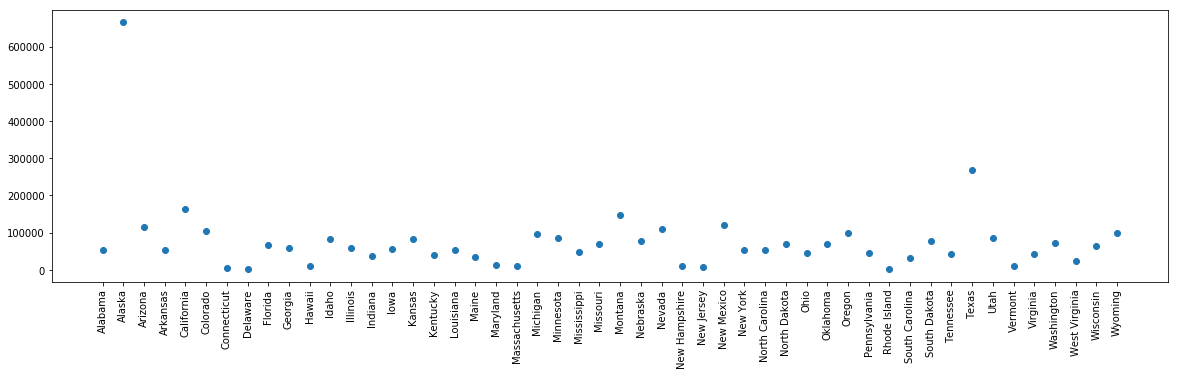

In [172]:
plt.figure(figsize=(20, 5))
plt.scatter(states.State.str.strip(), states.Area)
dummy = plt.xticks(rotation=90)

Notes
---

- `plt.figure(figsize=(20, 5))`: Easiest way to get the figure size you want, I reduced the height by 50% because we only have 1 plot
- `plt.scatter(states.State.str.strip(), states.<key>)`: This should be obvious
- `plt.xticks(rotation=90)`: The ticks will otherwise be unreadable
- `dummy = ...`: Again, suppress the output of setting the x ticks.

Tasks
---

1. Make a scatter plot of the `Density` using `matplotlib` with appropriate x labels and readable size
2. You can also call `plot` on `Series`. Call a `Series` style plot on `Density` with appropriate x labels and readable size. A line plot is fine.

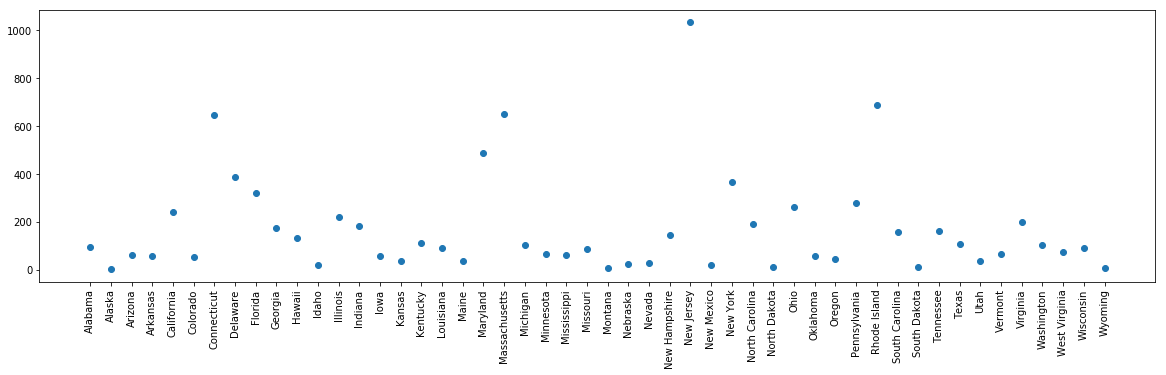

In [175]:
plt.figure(figsize=(20, 5))
plt.scatter(states.State.str.strip(), states.Density)
dummy = plt.xticks(rotation=90)

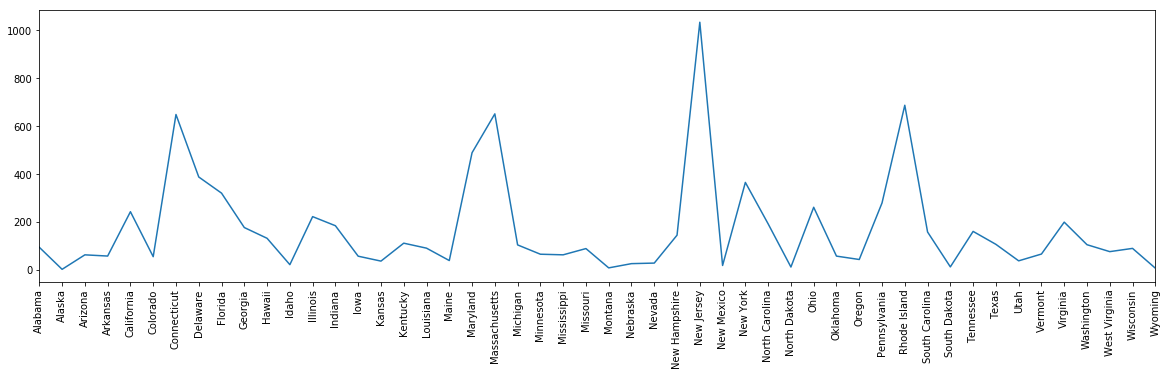

In [180]:
ax = states.Density.plot(figsize=(20, 5), xticks=states.index)
dummy = ax.set_xticklabels(states.State.str.strip(), rotation=90)

Modifying DataFrames
---

So, we have been calling `states.State.str.strip()` to generate reasonable x labels. What is going on there? Try the following cell:

In [192]:
state_string = states.State.loc[0]
state_string

'Alabama                   '

Note, there is a ton of space at the end of the state's name. Let's pretend I didn't do this on purpose and I would like to fix and write a new bsv file. The `str` object has a ton of useful functions for string manipulation. In this case, we want to `strip` off the whitespace:

In [193]:
state_string.strip()

'Alabama'

Now, I need to do this on the entire DataFrame. How can I do that?

As usual, there are a few options:

- Apply a lambda function to the Series

In [194]:
states.State.apply(lambda s: s.strip())

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

- __Or__, access the `.str` representation of the Series

In [195]:
states.State.str.strip()

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [ ]:
Both, 